## HEAVY LIFTING WITH SPARK ON INVESTIGATE
A journey through the struggles and lessons learnt by the Investigate data engineering team using Spark, Scala and functional programming principles. This presentation will give a brief introduction to the “heavy lifting” of data in Spark and the different scenarios where this technology really shines.


# Initialization of the spark context
Note that we can set things like driver memory etc.
If you have additional jars you want available in the Spark runtime,use the `launcher.jars` and/or `launcher.packages` settings, the latter using Maven "GAV" coordinates: 
```scala 
launcher.jars = ["/some/local/path/to/a/file.jar"] ,
launcher.packages = ["com.acme:super:1.0.1"] ,
```

In [1]:
%%init_spark
launcher.master = "local[*]"
launcher.conf.spark.app.name = "ParadisePapers"
launcher.conf.spark.driver.memory ="4g"
launcher.conf.spark.executor.cores = 8
launcher.conf.spark.executor.memory ="4g"
launcher.packages = ["graphframes:graphframes:0.8.1-spark3.0-s_2.12"]


# Lets write some scala!


In [2]:
val x:Int = 4

spark

Intitializing Scala interpreter ...

Spark Web UI available at http://0f520fd5899b:4041
SparkContext available as 'sc' (version = 3.0.1, master = local[*], app id = local-1615928931064)
SparkSession available as 'spark'


x: Int = 4
res0: org.apache.spark.sql.SparkSession = org.apache.spark.sql.SparkSession@75f3502a


# Example: Word Count


A MapReduce application is defined by a mapper function and a reducer function.

 - A **mapper** takes a single input value and emits a list of key-value pairs. 
 - A **reducer** takes an iterable over all values for a common key and emits a single value.

The following diagram summarizes the MapReduce pipeline:

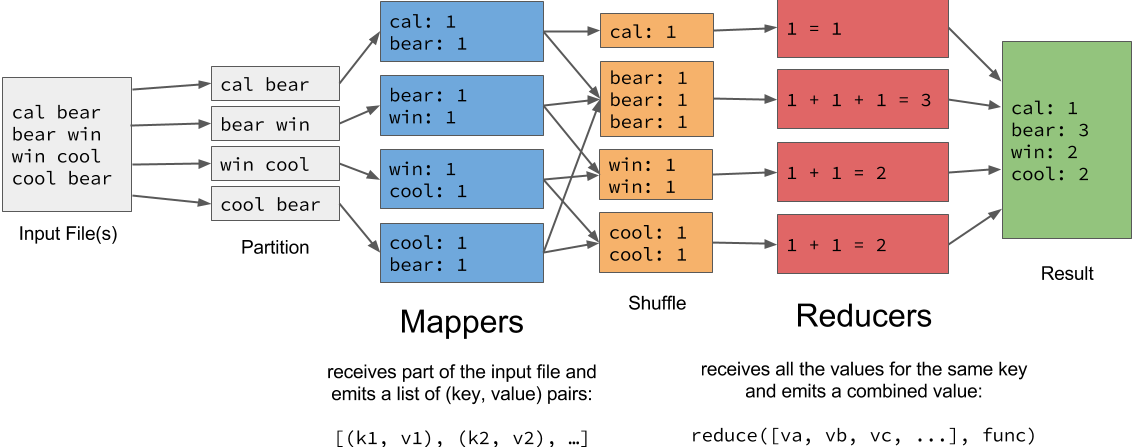

### RDD
```
    def map (func:A=> B)): RDD[B] (Functor)

    def flatMap (func: A=> T(U)): RDD[U]  (Monad) 
```
### PairRDDFunctions
```
    def reduceByKey(func: (V, V) ⇒ V): RDD[(K, V)]
```

In [3]:
//extracting
val addresses = sc.textFile("paradise_addresses.txt")
// val tokenizerF:String => TraversableOnce[String] = (line:String) => line.split("\\s+")
// val toWordCount: String => (String, Int)= word => (word,1)
//transform
val wordCountPipeline = addresses.flatMap(line => line.split("\\s+"))
                 .map(word => (word,1))
                 .reduceByKey(_ + _)


addresses: org.apache.spark.rdd.RDD[String] = paradise_addresses.txt MapPartitionsRDD[1] at textFile at <console>:26
wordCountPipeline: org.apache.spark.rdd.RDD[(String, Int)] = ShuffledRDD[4] at reduceByKey at <console>:32


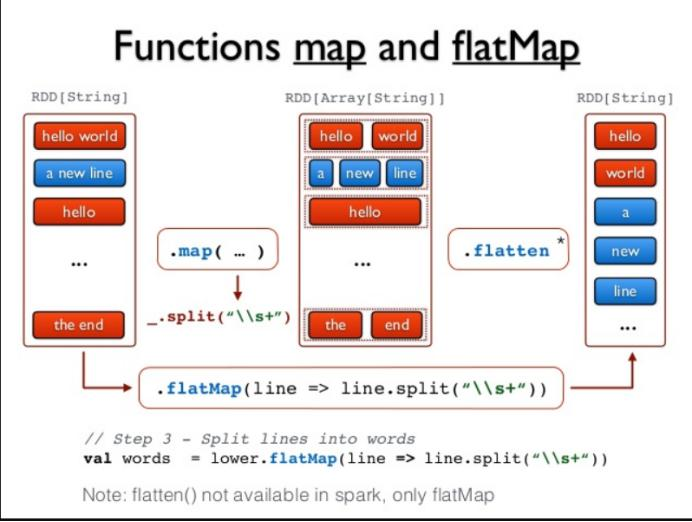

In [5]:
wordCountPipeline.toDF("word","count").orderBy(desc("count")).show(20)
wordCountPipeline.saveAsTextFile("word_count.txt")

+--------+-----+
|    word|count|
+--------+-----+
|  STREET|41183|
|      ST|30872|
|   MALTA|28919|
|    TRIQ|28061|
|    ROAD|21011|
|BARBADOS|15958|
|    FLAT|12008|
|      IL|11590|
|       1|11227|
|        |10831|
|      NO|10155|
|       2|10153|
|       S| 9438|
|   HOUSE| 9143|
|       O| 7753|
|       3| 7428|
|   COURT| 6880|
|  SLIEMA| 6680|
|     SAN| 6485|
| MICHAEL| 6271|
+--------+-----+
only showing top 20 rows

